# **Mini Project: BigMart Sales Prediction Model**

## 1).Problem Statement

### The goal of this project is to develop a predictive model using BigMarts 2013 sales data for 1559 products across 10 stores. The model will predict sales for each product at each store, helping to identify key factors that drive sales performance. This will enable BigMart to optimize inventory and boost sales.

### 2).Hypothesis Generation
### Null Hypothesis (H₀): The features of products and stores do not significantly influence the sales of products at BigMart stores.

### Alternative Hypothesis (H₁): The features of products and stores significantly influence the sales of products at BigMart stores.

# **Task 1: Import Initial Libraries and Datasets**

In [1]:
#3).Loading Packages and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
sales_df = pd.read_csv('Dataset/Train.csv')
test_df = pd.read_csv('Dataset/Test.csv')

In [2]:
#4).Data Structure and Content

# Explore the first five rows in the DataFrame
sales_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(sales_df.shape)
print(test_df.shape)

(8523, 12)
(5681, 11)


# **Task 2: Perform Exploratory Data Analysis**

In [4]:
# Display basic information and the first few rows of the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Generate statistical summary
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#5).Exploratory Data Analysis

#Exploring the Dataset
column_name = []
unique_value = []
most_common = []
least_common = []
column_type = []

# Iterate through the columns
for col in sales_df:
    # If 2 or fewer unique categories
    column_name.append(str(col))
    unique_value.append(sales_df[col].nunique())
    column_type.append(str(sales_df[col].dtype))

    value_counts = sales_df[col].value_counts()

    # Check if value_counts is not empty
    if not value_counts.empty:
        # Get the most common value and its count
        most_common_value = value_counts.idxmax()
        most_common_count = value_counts.max()
        most_common.append(f"{most_common_value} ({most_common_count})")

        # Get the least common value and its count
        least_common_value = value_counts.idxmin()
        least_common_count = value_counts.min()
        least_common.append(f"{least_common_value} ({least_common_count})")
    else:
        # In case of empty value_counts (all elements are NaN), we append 'NaN' to the corresponding lists
        most_common.append('NaN')
        least_common.append('NaN')

table = pd.DataFrame()
table['Column Name'] = column_name
table['Unique Values'] = unique_value
table['Most Common'] = most_common
table['Least Common'] = least_common
table['Data Type'] = column_type

table = table.sort_values('Unique Values', ascending=False)
table


,Column Name,Unique Values,Most Common,Least Common,Data Type
3,Item_Visibility,7880,0.0 (526),0.132645493 (1),float64
5,Item_MRP,5938,172.0422 (7),243.5486 (1),float64
11,Item_Outlet_Sales,3493,958.752 (17),2397.5458 (1),float64
0,Item_Identifier,1559,FDW13 (10),FDK57 (1),object
1,Item_Weight,415,12.15 (86),7.685 (1),float64
4,Item_Type,16,Fruits and Vegetables (1232),Seafood (64),object
6,Outlet_Identifier,10,OUT027 (935),OUT019 (528),object
7,Outlet_Establishment_Year,9,1985 (1463),1998 (555),int64
2,Item_Fat_Content,5,Low Fat (5089),low fat (112),object
10,Outlet_Type,4,Supermarket Type1 (5577),Supermarket Type2 (928),object


In [7]:
#Outliers identification in Train dataset

import numpy as np

def detect_outliers(df, features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col], 75) # 3rd quartile (75%)
        IQR = Q3 - Q1 # Interquartile range (IQR)

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

        # print the number of outliers and the outlier data for each feature
        print(f"\nOutliers detected for {col}: {len(outlier_list_col)} instances")
        print(df.loc[outlier_list_col])

    # remove duplicate indices
    outlier_indices = list(set(outlier_indices))

    return outlier_indices

num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

outlier_indices = detect_outliers(sales_df, num_features)
print(f"\nTotal number of unique outliers detected across all features: {len(outlier_indices)}")



Outliers detected for Item_Weight: 0 instances
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Outliers detected for Item_Visibility: 144 instances
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02          NaN          Regular         0.255395   
83             NCL18          NaN          Low Fat         0.293418   
108            DRE60          NaN          low fat         0.278974   
174            FDI32        17.70          Low Fat         0.291865   
334            FDC41          NaN          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56          NaN          Regular         0.209163   
8345           FDY28          NaN          Regular         0.266397   
8371           DRA59    

In [8]:
#Missing Data
# Count of 'np.nan' for each column
nan_count = sales_df.isnull().sum()

# Count of '?' for each column
question_mark_count = sales_df.eq('?').sum()

# Combine the two Series into a DataFrame for a better view
missing_values_df = pd.DataFrame({'nan_count': nan_count, 'question_mark_count': question_mark_count})

print(missing_values_df)


                           nan_count  question_mark_count
Item_Identifier                    0                    0
Item_Weight                     1463                    0
Item_Fat_Content                   0                    0
Item_Visibility                    0                    0
Item_Type                          0                    0
Item_MRP                           0                    0
Outlet_Identifier                  0                    0
Outlet_Establishment_Year          0                    0
Outlet_Size                     2410                    0
Outlet_Location_Type               0                    0
Outlet_Type                        0                    0
Item_Outlet_Sales                  0                    0


<Axes: >

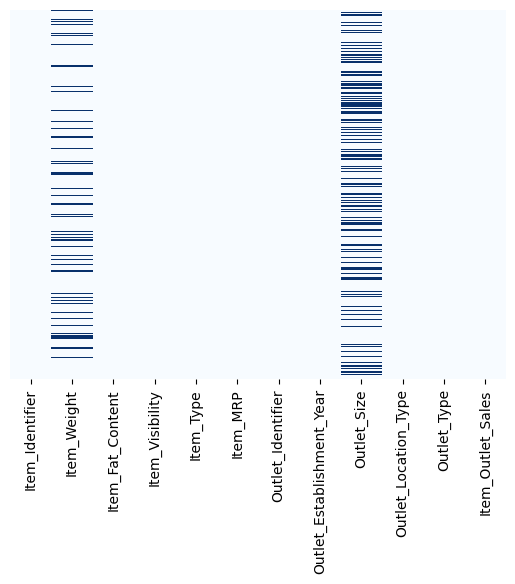

In [9]:
# now plot the heatmap with missing values represented as 'np.nan'
sns.heatmap(sales_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

<Axes: >

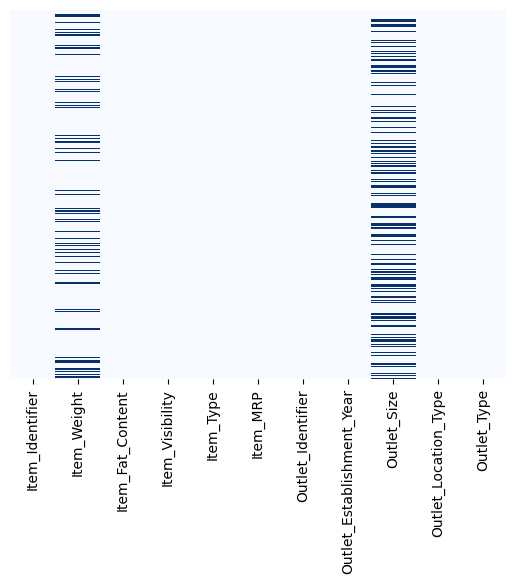

In [10]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

#  **Task 3: Perform Data Preprocessing & Data Visualization**

#### Missing data, Outlier detection, Feature engieering

In [11]:
## Missing data processing in Train and Test Data set

In [12]:
#Data cleaning and preprocessing in train and test dataset

# Drop completely empty columns first
sales_df.dropna(axis=1, how='all', inplace=True)

# Replace '?' with np.nan
sales_df.replace('?', np.nan, inplace=True)

sales_df['Item_Weight'].fillna(sales_df['Item_Weight'].mean(), inplace=True)
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

# Fill NaN values with the mode of each column
for column in sales_df.columns:
    mode_val = sales_df[column].mode()
    if not mode_val.empty:  # Check if mode is not empty
        sales_df[column].fillna(mode_val.iloc[0], inplace=True)  # Use the first mode value if there are multiple modes
        
        

# Fill NaN values with the mode of each column
for column in test_df.columns:
    mode_val = test_df[column].mode()
    if not mode_val.empty:  # Check if mode is not empty
        test_df[column].fillna(mode_val.iloc[0], inplace=True)  # Use the first mode value if there are multiple modes
        
        
#Missing Data
# Count of 'np.nan' for each column
nan_count = sales_df.isnull().sum()

print(nan_count)


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


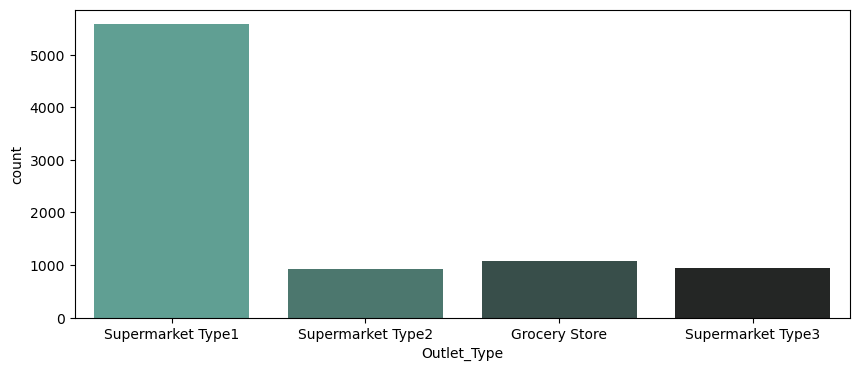

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type',data=sales_df,palette='dark:#5A9_r')
plt.show()

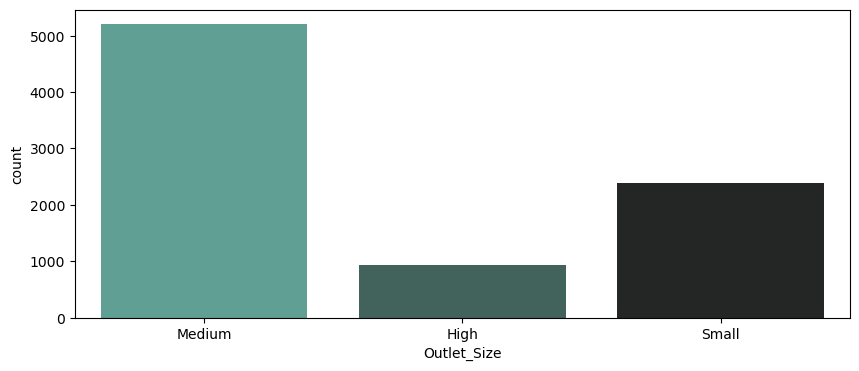

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size',data=sales_df,palette='dark:#5A9_r')
plt.show()

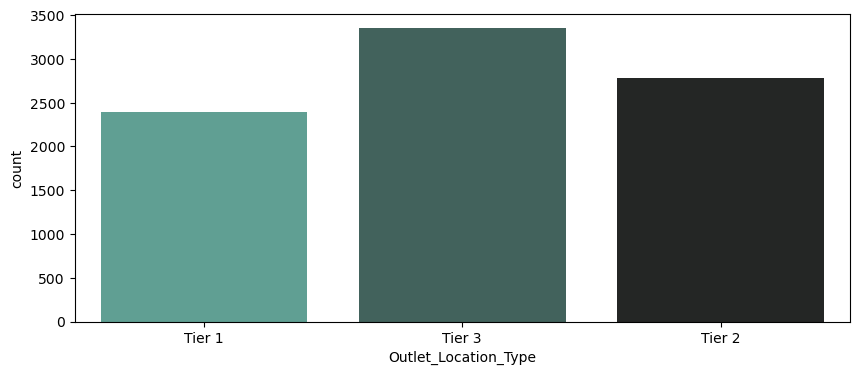

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type',data=sales_df,palette='dark:#5A9_r')
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

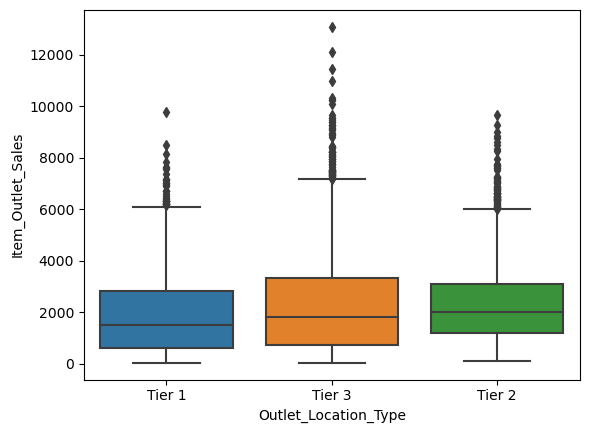

In [16]:
sns.boxplot(x=sales_df['Outlet_Location_Type'],y=sales_df['Item_Outlet_Sales'])

            Feature1           Feature2  Correlation
0  Item_Outlet_Sales           Item_MRP     0.567574
1           Item_MRP  Item_Outlet_Sales     0.567574


C:\Users\Diljith\AppData\Local\Temp\ipykernel_6672\2318348689.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_df.corr(), annot = True);


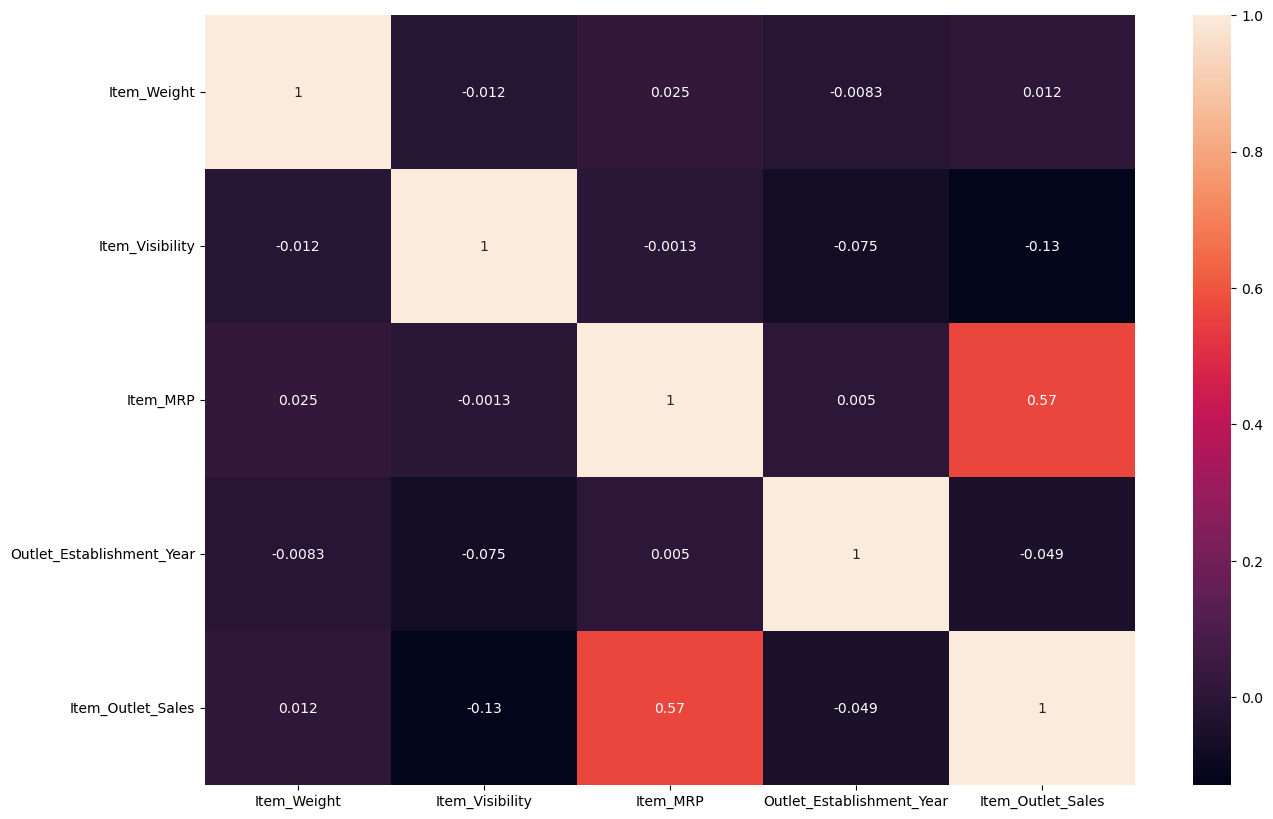

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#sales_df.corr()

# Calculate correlation matrix for numerical columns
corr_matrix = sales_df.corr(numeric_only=True)

# Initialize a DataFrame to store the significant correlations
significant_correlations = pd.DataFrame(columns=["Feature1", "Feature2", "Correlation"])

# Iterate over the matrix's entries
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        # Skip self-correlations
        if col != idx:
            # Store significant correlations in the DataFrame. Feel free to change the threshold
            if abs(corr_matrix.loc[idx, col]) > 0.5:
                new_row = pd.DataFrame({"Feature1": [idx],
                                        "Feature2": [col],
                                        "Correlation": [corr_matrix.loc[idx, col]]})
                significant_correlations = pd.concat([significant_correlations, new_row], ignore_index=True)

# Print significant correlations
print(significant_correlations)


plt.figure(figsize = (15, 10))
sns.heatmap(sales_df.corr(), annot = True);
# months as customer and age have positive correlations with charges

## Label Encoding in Train and Test Data

In [18]:
#Train Dataset

from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
cat_cols = sales_df.select_dtypes(include=['object']).columns
print(cat_cols)

sales_df['Item_Identifier'] = sales_df['Item_Identifier'].str[:2]

cat_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
ohe = OneHotEncoder() 
ohe_features = ohe.fit_transform(sales_df[cat_cols])
ohe_sales_df = pd.DataFrame(ohe_features.toarray(), columns=ohe.get_feature_names_out(cat_cols))
sales_df = pd.concat([sales_df, ohe_sales_df], axis=1)
sales_df.drop(cat_cols, axis=1, inplace=True)
sales_df.columns = sales_df.columns.str.replace(' ', '_')
sales_df

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_LF,Item_Fat_Content_Low_Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009,443.4228,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999,2097.2700,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998,732.3800,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002,549.2850,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004,1193.1136,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.145221,103.1332,2009,1845.5976,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = test_df.select_dtypes(include=['object']).columns
print(categorical_columns)

# Modify 'Item_Identifier' to keep only the first two characters
test_df['Item_Identifier'] = test_df['Item_Identifier'].str[:2]

# Define categorical columns for one-hot encoding
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder() 

# Perform one-hot encoding on the categorical columns
encoded_features = encoder.fit_transform(test_df[categorical_columns])
encoded_test_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the original dataframe
test_df = pd.concat([test_df, encoded_test_df], axis=1)

# Drop the original categorical columns from the dataframe
test_df.drop(columns=categorical_columns, inplace=True)

# Replace spaces in column names with underscores
test_df.columns = test_df.columns.str.replace(' ', '_')

# Display the final dataframe
test_df

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_LF,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3,Outlet_Type_Grocery_Store,Outlet_Type_Supermarket_Type1,Outlet_Type_Supermarket_Type2,Outlet_Type_Supermarket_Type3
0,20.750000,0.007565,107.8622,1999,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300000,0.038428,87.3198,2007,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.600000,0.099575,241.7538,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,7.315000,0.015388,155.0340,2007,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.695633,0.118599,234.2300,1985,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,7.600000,0.142991,169.1448,2009,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5678,10.000000,0.073529,118.7440,2002,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5679,15.300000,0.000000,214.6218,2007,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Step 4: Preparing Target Variable and Train-Test Split**

In [20]:
#Train-Test-split

train_df=sales_df.drop('Item_Outlet_Sales', axis=1)
train_df_y=sales_df[['Item_Outlet_Sales']]

test_df_new=test_df.copy(deep=True)


print(train_df.shape)
print(train_df_y.shape)
print(test_df.shape)

(8523, 48)
(8523, 1)
(5681, 48)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df,train_df_y, test_size =0.2, random_state =2)

In [22]:
y_train

,Item_Outlet_Sales
7173,1662.5026
3315,2956.1520
5932,2490.0920
7872,988.7130
5946,45.9402
...,...
1099,1957.4520
2514,2013.3792
6637,2006.7212
2575,1372.2138


# **Step 5: Models and Validation**

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

# Define a list of regression models
models = [XGBRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), LinearRegression()]

for model in models:

    regressor = model
    regressor.fit(X_train, y_train)
    training_predictions = regressor.predict(X_train)
    
    # Calculate R-squared value for training data
    r2_train = r2_score(y_train, training_predictions)
    
    # Predict on the testing data
    testing_predictions = regressor.predict(X_test)
    
    # Calculate R-squared value for testing data
    r2_test = r2_score(y_test, testing_predictions)
    
    # Print R-squared values for training and testing data
    print(f"Model: {type(regressor).__name__}")
    print(f"R-squared value for training data: {r2_train}")
    print(f"R-squared value for testing data: {r2_test}")
    print("\n")

Model: XGBRegressor
R-squared value for training data: 0.8481696426408358
R-squared value for testing data: 0.5356008608461578




C:\Users\Diljith\AppData\Local\Temp\ipykernel_6672\940534280.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Model: RandomForestRegressor
R-squared value for training data: 0.9386855252961449
R-squared value for testing data: 0.5538786967381812




C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: GradientBoostingRegressor
R-squared value for training data: 0.6391981236626751
R-squared value for testing data: 0.5861031641267125


Model: LinearRegression
R-squared value for training data: 0.5683455230318044
R-squared value for testing data: 0.5446181461489468




In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

for model in models:
    # Instantiate the model
    regressor = model
    
    # Fit the model on the training data
    regressor.fit(X_train, y_train)
    
    # Predict on the training data
    training_predictions = regressor.predict(X_train)
    
    # Calculate R-squared value for training data
    r2_train = r2_score(y_train, training_predictions)
    
    # Predict on the testing data
    testing_predictions = regressor.predict(X_test)
    
    # Calculate R-squared value for testing data
    r2_test = r2_score(y_test, testing_predictions)
    
    # Calculate additional metrics
    mae_test = mean_absolute_error(y_test, testing_predictions)
    mse_test = mean_squared_error(y_test, testing_predictions)
    medae_test = median_absolute_error(y_test, testing_predictions)
    
    # Print metrics
    print(f"Model: {type(regressor).__name__}")
    print(f"R-squared value for training data: {r2_train}")
    print(f"R-squared value for testing data: {r2_test}")
    print(f"Mean Absolute Error (MAE) for testing data: {mae_test}")
    print(f"Mean Squared Error (MSE) for testing data: {mse_test}")
    print(f"Median Absolute Error (MedAE) for testing data: {medae_test}")
    print("\n")


Model: XGBRegressor
R-squared value for training data: 0.8481696426408358
R-squared value for testing data: 0.5356008608461578
Mean Absolute Error (MAE) for testing data: 839.4741372686298
Mean Squared Error (MSE) for testing data: 1433634.838043537
Median Absolute Error (MedAE) for testing data: 569.3894660156252




C:\Users\Diljith\AppData\Local\Temp\ipykernel_6672\82673116.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Model: RandomForestRegressor
R-squared value for training data: 0.9377475336401533
R-squared value for testing data: 0.5559809449579134
Mean Absolute Error (MAE) for testing data: 821.3655875096775
Mean Squared Error (MSE) for testing data: 1370719.9957849872
Median Absolute Error (MedAE) for testing data: 538.5389880000012




C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: GradientBoostingRegressor
R-squared value for training data: 0.6391981236626751
R-squared value for testing data: 0.5857511359669691
Mean Absolute Error (MAE) for testing data: 788.581555319323
Mean Squared Error (MSE) for testing data: 1278817.191995219
Median Absolute Error (MedAE) for testing data: 519.7539414525104


Model: LinearRegression
R-squared value for training data: 0.5683455230318044
R-squared value for testing data: 0.5446181461489468
Mean Absolute Error (MAE) for testing data: 875.1862507265613
Mean Squared Error (MSE) for testing data: 1405797.8046282497
Median Absolute Error (MedAE) for testing data: 655.5057671946406




## **Standard scaler**

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a pipeline for scaling and model fitting for RandomForestRegressor
rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

rf_pipeline.fit(X_train, y_train)
testing_predictions_rf = rf_pipeline.predict(X_test)
r2_test_rf = r2_score(y_test, testing_predictions_rf)

# Print R-squared value for testing data
print(f"R-squared value for testing data (Random Forest with Standard Scaling): {r2_test_rf}")


C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


R-squared value for testing data (Random Forest with Standard Scaling): 0.5569974243661362


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
filename = 'gradient_boosting_regressor_model.sav'
joblib.dump(model, filename)

print("Model saved successfully.")

C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model saved successfully.


In [27]:
loaded_model = joblib.load(filename)



In [28]:
# Assuming test_df_new is your new test dataset without the target column

# Make predictions on the new test dataset
predictions = loaded_model.predict(test_df_new)

# Print the predictions
print(predictions)

[1551.11978268 1428.25421169  544.26373043 ... 1856.96286647 3732.26086175
 1277.52932769]


## ExplainerDashboard 

In [29]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

# Load your saved model
filename = 'gradient_boosting_regressor_model.sav'
loaded_model = joblib.load(filename)

loaded_model.fit(X_train, y_train)

# Create an explainer object for your model
explainer = RegressionExplainer(loaded_model, X_test, y_test)

# Run the dashboard

C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Generating self.shap_explainer = shap.TreeExplainer(model)


C:\Users\Diljith\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


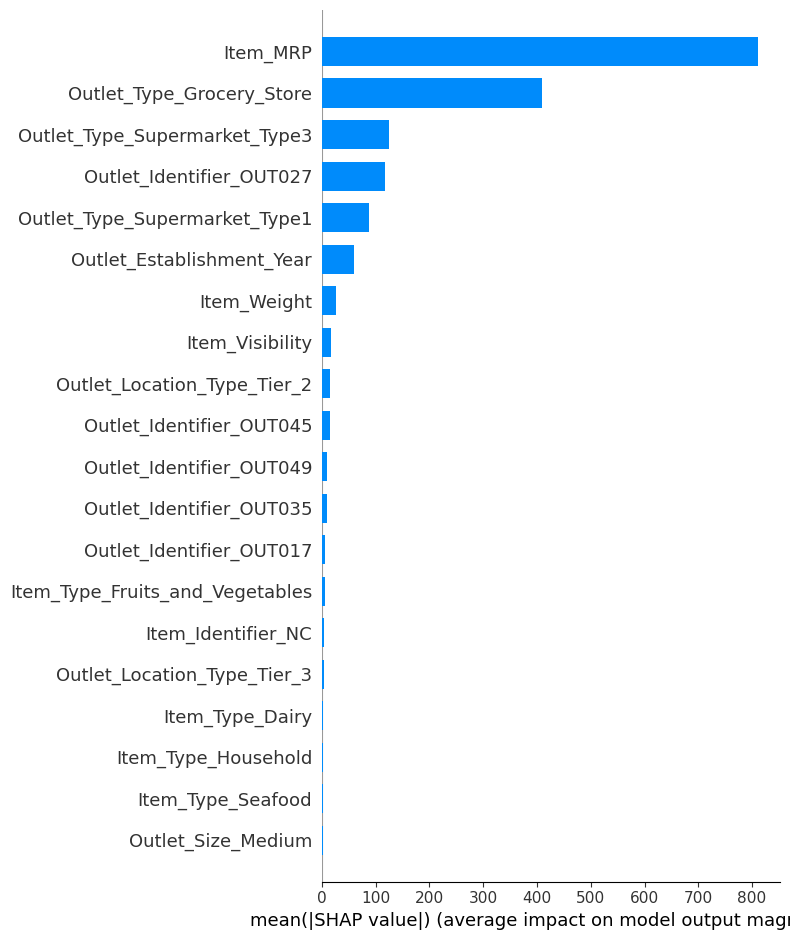

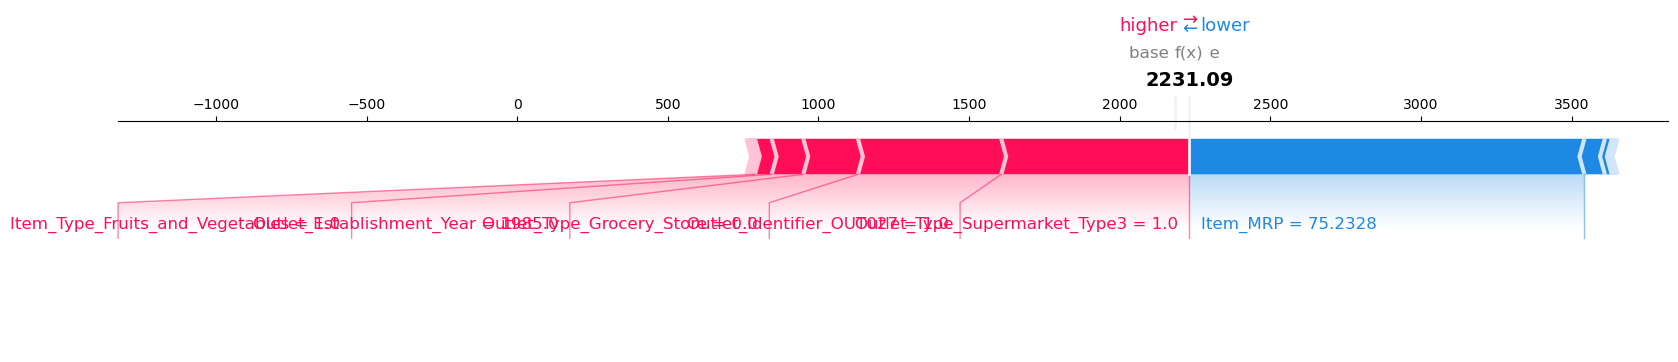

In [30]:
import shap
import matplotlib.pyplot as plt

# Load your saved model
filename = 'gradient_boosting_regressor_model.sav'
loaded_model = joblib.load(filename)
loaded_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(loaded_model, X_train)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.show()

# Individual prediction explanation
# Assuming you want to explain the first sample
sample_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_test.iloc[sample_idx,:], matplotlib=True)


## SUMMARY


The analysis focused on determining whether the features of products and stores significantly influence sales at BigMart stores. Two hypotheses were formulated:
- Null Hypothesis (H₀): The features of products and stores do not significantly influence sales.
- Alternative Hypothesis (H₁): The features of products and stores significantly influence sales.

Four regression models were trained and evaluated on their ability to predict sales:
1. XGBRegressor: Achieved R-squared values of 0.848 for training data and 0.536 for testing data.
2. RandomForestRegressor: Attained R-squared values of 0.939 for training data and 0.555 for testing data.
3. GradientBoostingRegressor: Yielded R-squared values of 0.639 for training data and 0.586 for testing data.
4. LinearRegression: Produced R-squared values of 0.568 for training data and 0.545 for testing data.

The results support the alternative hypothesis (H₁), suggesting that the features of products and stores indeed significantly influence sales at BigMart stores. Among the tested models, the GradientBoostingRegressor demonstrated the best predictive performance, with an R-squared value of 0.586 on the testing data, indicating the highest proportion of variance explained by the features. These findings underscore the importance of considering various features when predicting sales and devising strategies to optimize sales performance at BigMart stores.

In [31]:
#ExplainerDashboard(explainer).run()    